<a href="https://colab.research.google.com/github/Kilvia/MLP-clothes-types/blob/main/Practice_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron Practice with TensorFlow
Use Tensorflow to create a simple Neural Network Structure, Multi Layer Perceptron(MLP).
The goal is to create a model to distinguish the types of clothes using Fashion MNIST.

## Import Tensorflow

In [1]:
import tensorflow as tf

## Load Dataset


In [8]:
# Split train set into train/valid set
from sklearn import model_selection

fashion_db = tf.keras.datasets.fashion_mnist

# Load data and split into test and train
(x_train, y_train), (x_test, y_test) = fashion_db.load_data()

x_train, x_valid,  y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



[[[  0   0   0 ...   0   0   0]
  [  0   0   1 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  1   0   0 ...  42  31   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   4   0 ...   0   8   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [ 27 203 186 ... 170 173  21]
  [  0   0   0 ...  45  47   0]
  [  0   0   0 ...   0   0  

## Check the Dataset

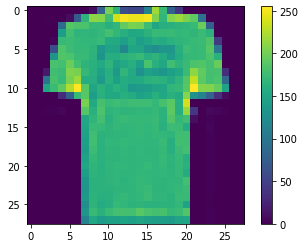

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Model Configuration

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # First parameter the amount of nodes of the layer, Second parameter the activation function
    tf.keras.layers.Dense(128, activation='relu'),
    # Randomly sets a percentage of input units to 0 at each step during training with the goal to prevent overfitting 
    tf.keras.layers.Dropout(0.2),
    # First parameter the amount of nodes of the layer, Second parameter the activation function
    tf.keras.layers.Dense(10, activation='softmax')
])

## Loss, Optimizer, Metrics

In [13]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam(learning_rate=0.001)

In [15]:
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training

In [16]:
# Validation data is optional
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.8403 - accuracy: 0.5735 - val_loss: 0.9562 - val_accuracy: 0.6990
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9960 - accuracy: 0.6379 - val_loss: 0.7293 - val_accuracy: 0.7216
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9148 - accuracy: 0.6544 - val_loss: 0.7214 - val_accuracy: 0.7215
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8873 - accuracy: 0.6627 - val_loss: 0.7339 - val_accuracy: 0.7194
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8307 - accuracy: 0.6795 - val_loss: 0.6924 - val_accuracy: 0.7402
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8084 - accuracy: 0.6836 - val_loss: 0.6930 - val_accuracy: 0.7279
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.8399 - accuracy: 0.6763 - val_loss: 0.7538 - val_accuracy:

## Check Results

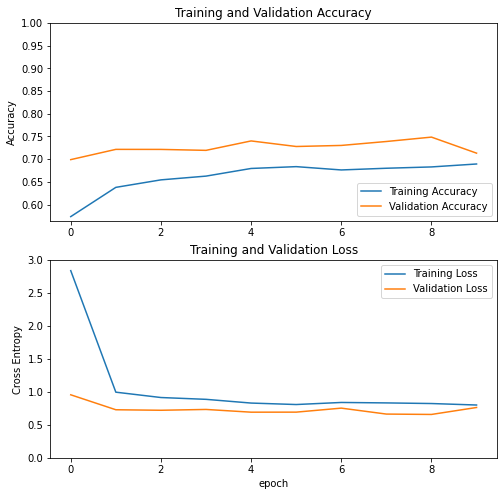

In [19]:
# Training accuracy and validation accuracy
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Training loss and validation loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Make a graph to see the results
# Accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

# Show the 2 graphs
plt.show()

In [21]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.7882 - accuracy: 0.7045 - 292ms/epoch - 932us/step


[0.7881643772125244, 0.7045000195503235]

In [22]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 924us/step


Extract one sample from the test set and compare the correct answer with the predicted one.

In [38]:
import numpy as np

# Plot image with label
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
# Plot
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    _ = plt.xticks(range(10), class_names, rotation=45)

    # If the predicted value is wrong red otherwise green
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

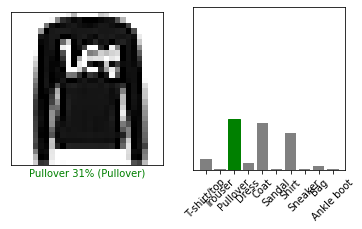

In [39]:
# Index to check the result
i =1 
plt.figure(figsize=(6,3))

# Plot the image and predicted class
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test)

# Plot predicted probability
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)
plt.show()
